# Homework 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy.integrate import quad
from scipy.special import gamma
from numpy.random import random

plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 13,
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsfonts}"
})

## Problem 1

Consider the following simple model of an electronic capacitor, consisting of two flat metal plates enclosed in a square metal box:

<img src='Capacitor.png' width=450 height=400>

For simplicity let us model the system in two dimensions. Notice that the capacitor plates are at fixed voltage, not fixed charge. So, in effect, the capacitor plates are part of the boundary condition in this case.

**References**
- Computational Physics, M. Newman (2013)

### Problem 1.1 (3 points)

Use the (accelerated) relaxation method to calculate the electrostatic potential in the box on a $100 \times 100$ grid (so there are $101 \times 101$ grid points).

In [2]:
# Write your code here
N = 100        # number of grids
omega = 0.9    # overrelaxation parameter
epsilon = 1e-6 # target accuracy

V = [1.0,-1.0]        # voltage at top wall

BCx_index = ((N)/10*np.array([2,8])).astype(int)
BCy_index = np.arange(int((N)/10*2),int((N)/10*8)+1,1,dtype=int)

phi0 = np.zeros([N+1,N+1])
for j in range(len(BCx_index)):
    for i in range(len(BCy_index)):
        phi0[BCy_index[i],BCx_index[j]] = V[j]
        
phi = phi0.copy()
delta = 1.0
while delta > epsilon:
    phi_old = phi.copy()
    
    for i in range(N+1):
        for j in range(N+1):
            if (i == 0) or (i == N) or (j == 0) or (j == N):
                phi[i,j] = phi[i,j]
            elif (j==20 and 20<=i<=80) or (j==80 and 20<=i<=80):
                phi[i,j] = phi[i,j]
            else:
                phi[i,j] = (1+omega) * (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) / 4 - omega * phi[i,j]

    delta = np.max(abs(phi - phi_old))

### Problem 1.2 (1 point)

Make a plot of the result.

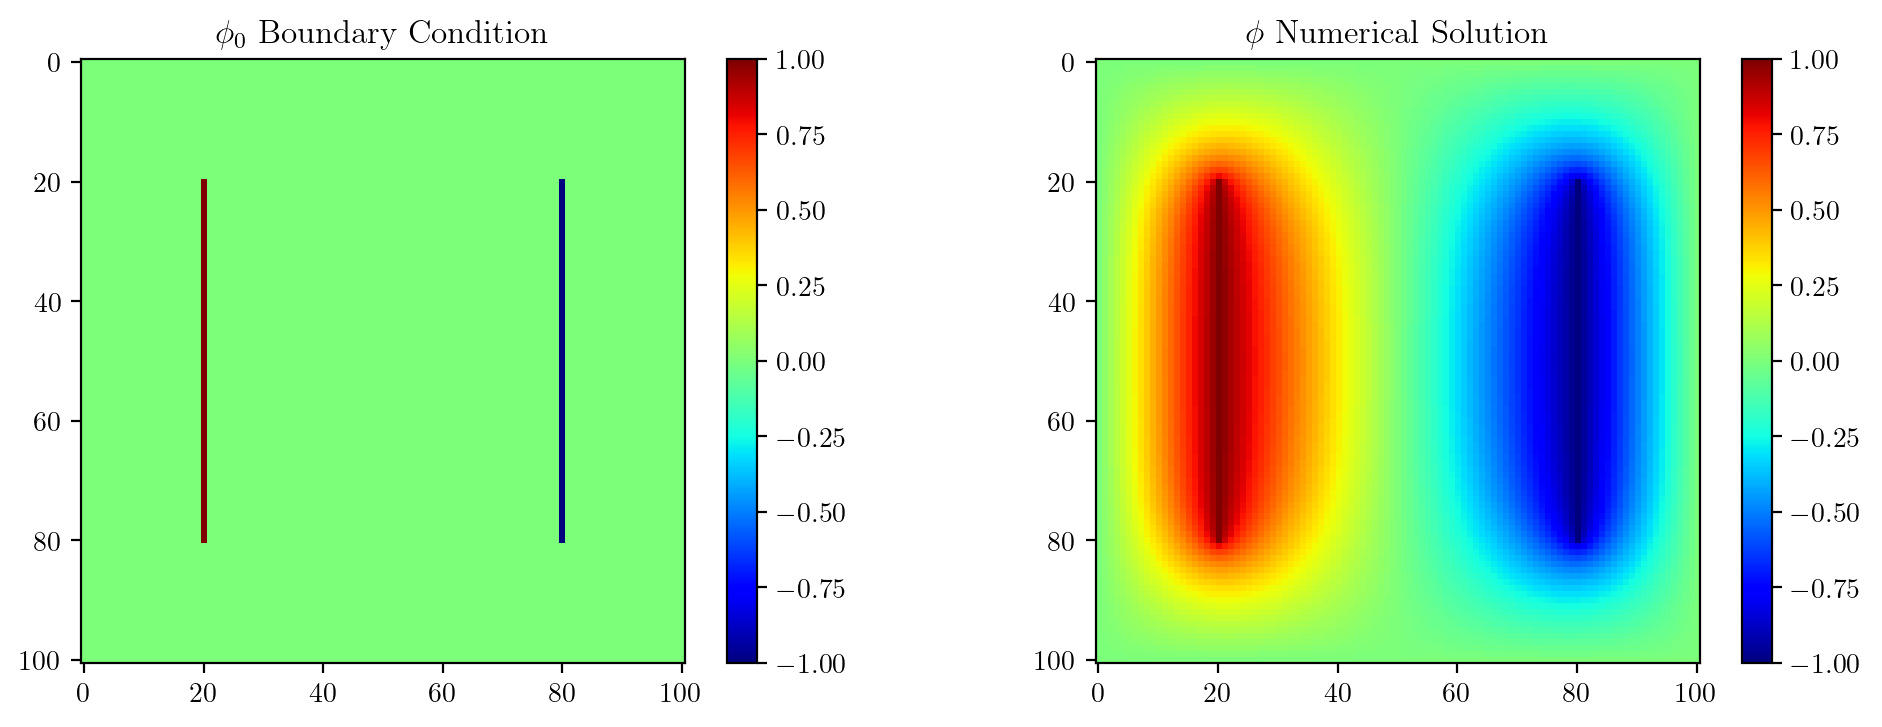

In [3]:
# Write your code here
fig,ax = plt.subplots(1,2,figsize=(12,4),dpi=200)
plt.colorbar(ax[0].imshow(phi0, cmap='jet'),ax=ax[0])
plt.colorbar(ax[1].imshow(phi, cmap='jet'),ax=ax[1])
ax[0].set_title("$\\phi_0$ Boundary Condition")
ax[1].set_title("$\\phi$ Numerical Solution")
plt.show()

## Problem 2

An $n$-dimensional unit hypersphere $S^n$ is defined as

$$
S^n = \left\{ (x_1, x_2, \cdots, x_n) : x_1^2 + x_2^2 + \dots + x_n^2 \le 1 \right\}
$$

The volume of $S^n$ is given by

$$
V_n = \frac{\pi^\frac{n}{2}}{\Gamma(\frac{n}{2}+1)}
$$

where $\Gamma(x)$ is the gamma function which can be accessed by calling `scipy.special.gamma()`.

**References**
- [n-sphere](https://en.wikipedia.org/wiki/N-sphere), Wikipedia

### Problem 2.1 (2 points)

Use Monte Carlo integration to estimate the volume of such a hypersphere for $n = 1, 2, \dots, 10$. Use $N = 1\ 000\ 000$ sample points for each case.

In [4]:
# Write your code here
def V_hypersphere_MC(n, N=200000):
    x = 2 * (random((N, n)) - 0.5) # shape: (N, n)
    norm2 = np.sum(x**2, axis=1)   # find 2-norm
    I_ = np.sum(norm2 <= 1)        # inside the ball
    V = 2**n/N * I_                # Volumn
    return V

for n in range(1,11):
    V = V_hypersphere_MC(n)
    print('V_%2d = %.4f' %(n,V))

V_ 1 = 2.0000
V_ 2 = 3.1427
V_ 3 = 4.1876
V_ 4 = 4.9380
V_ 5 = 5.2866
V_ 6 = 5.1965
V_ 7 = 4.7501
V_ 8 = 3.9501
V_ 9 = 3.2614
V_10 = 2.4883


### Problem 2.2 (2 points)

Compare your result with the analytic formula by making a plot of $V_n (\text{Monte Carlo})$ versus $V_n (\text{formula})$ for $n = 1, 2, \dots, 10$.

Calculating Volumn of Hypersphere...
n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ]
Calculateing done !


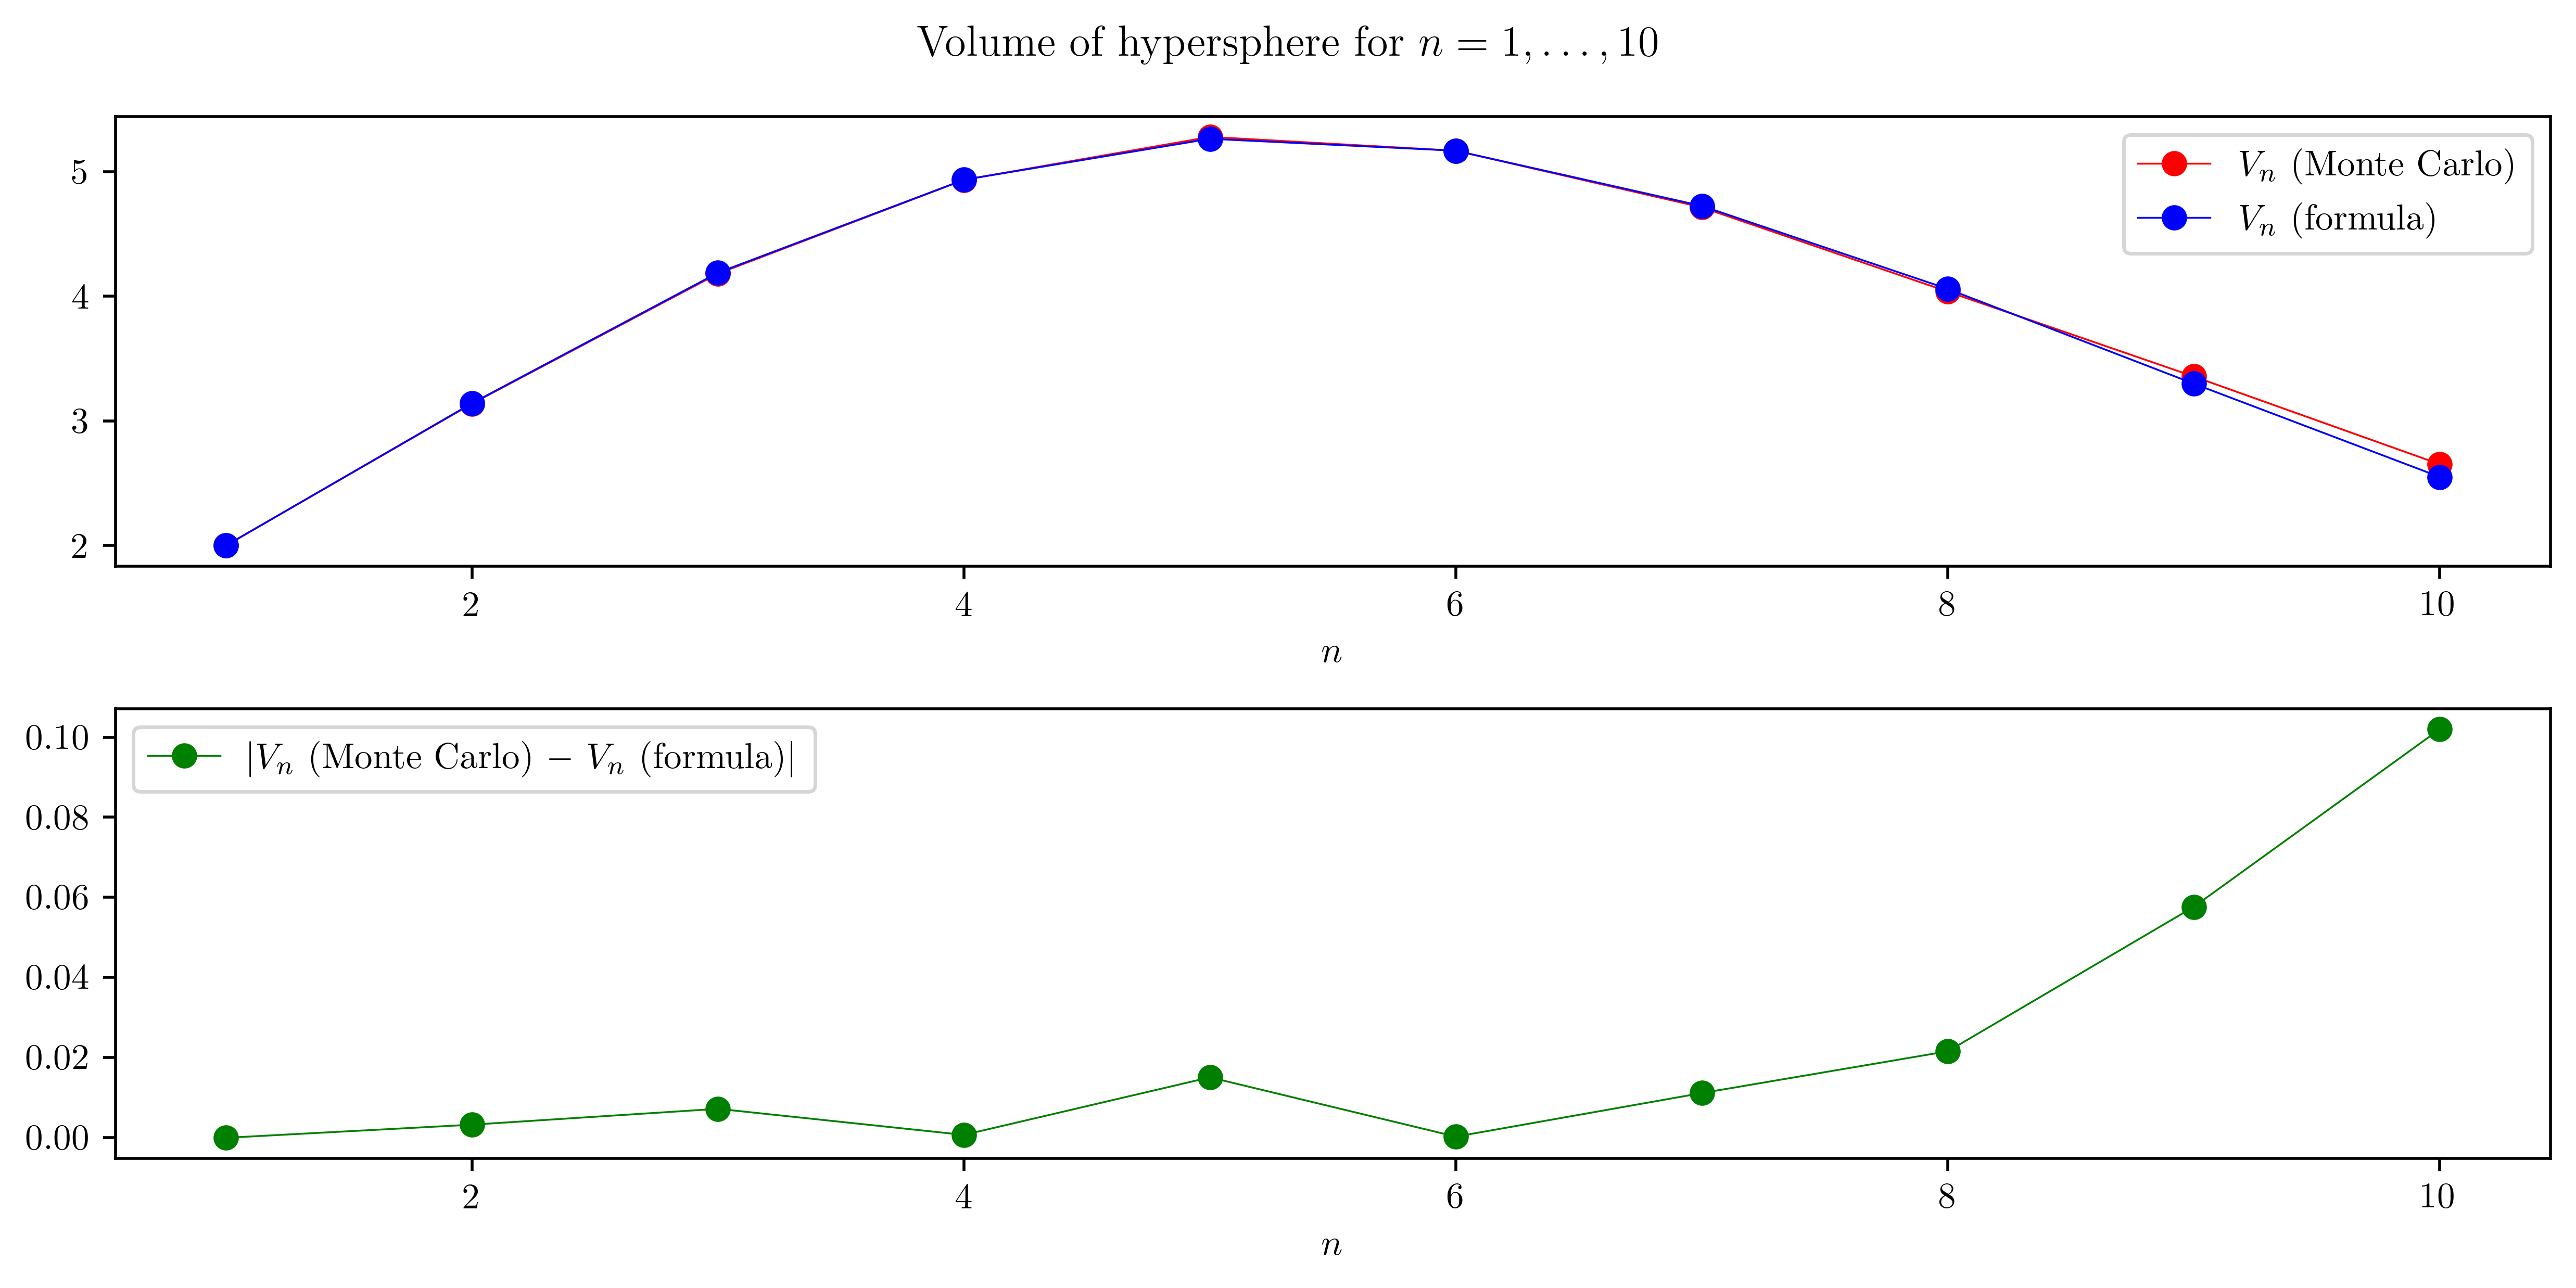

Calculating Volumn of Hypersphere...
n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, ]
Calculateing done !


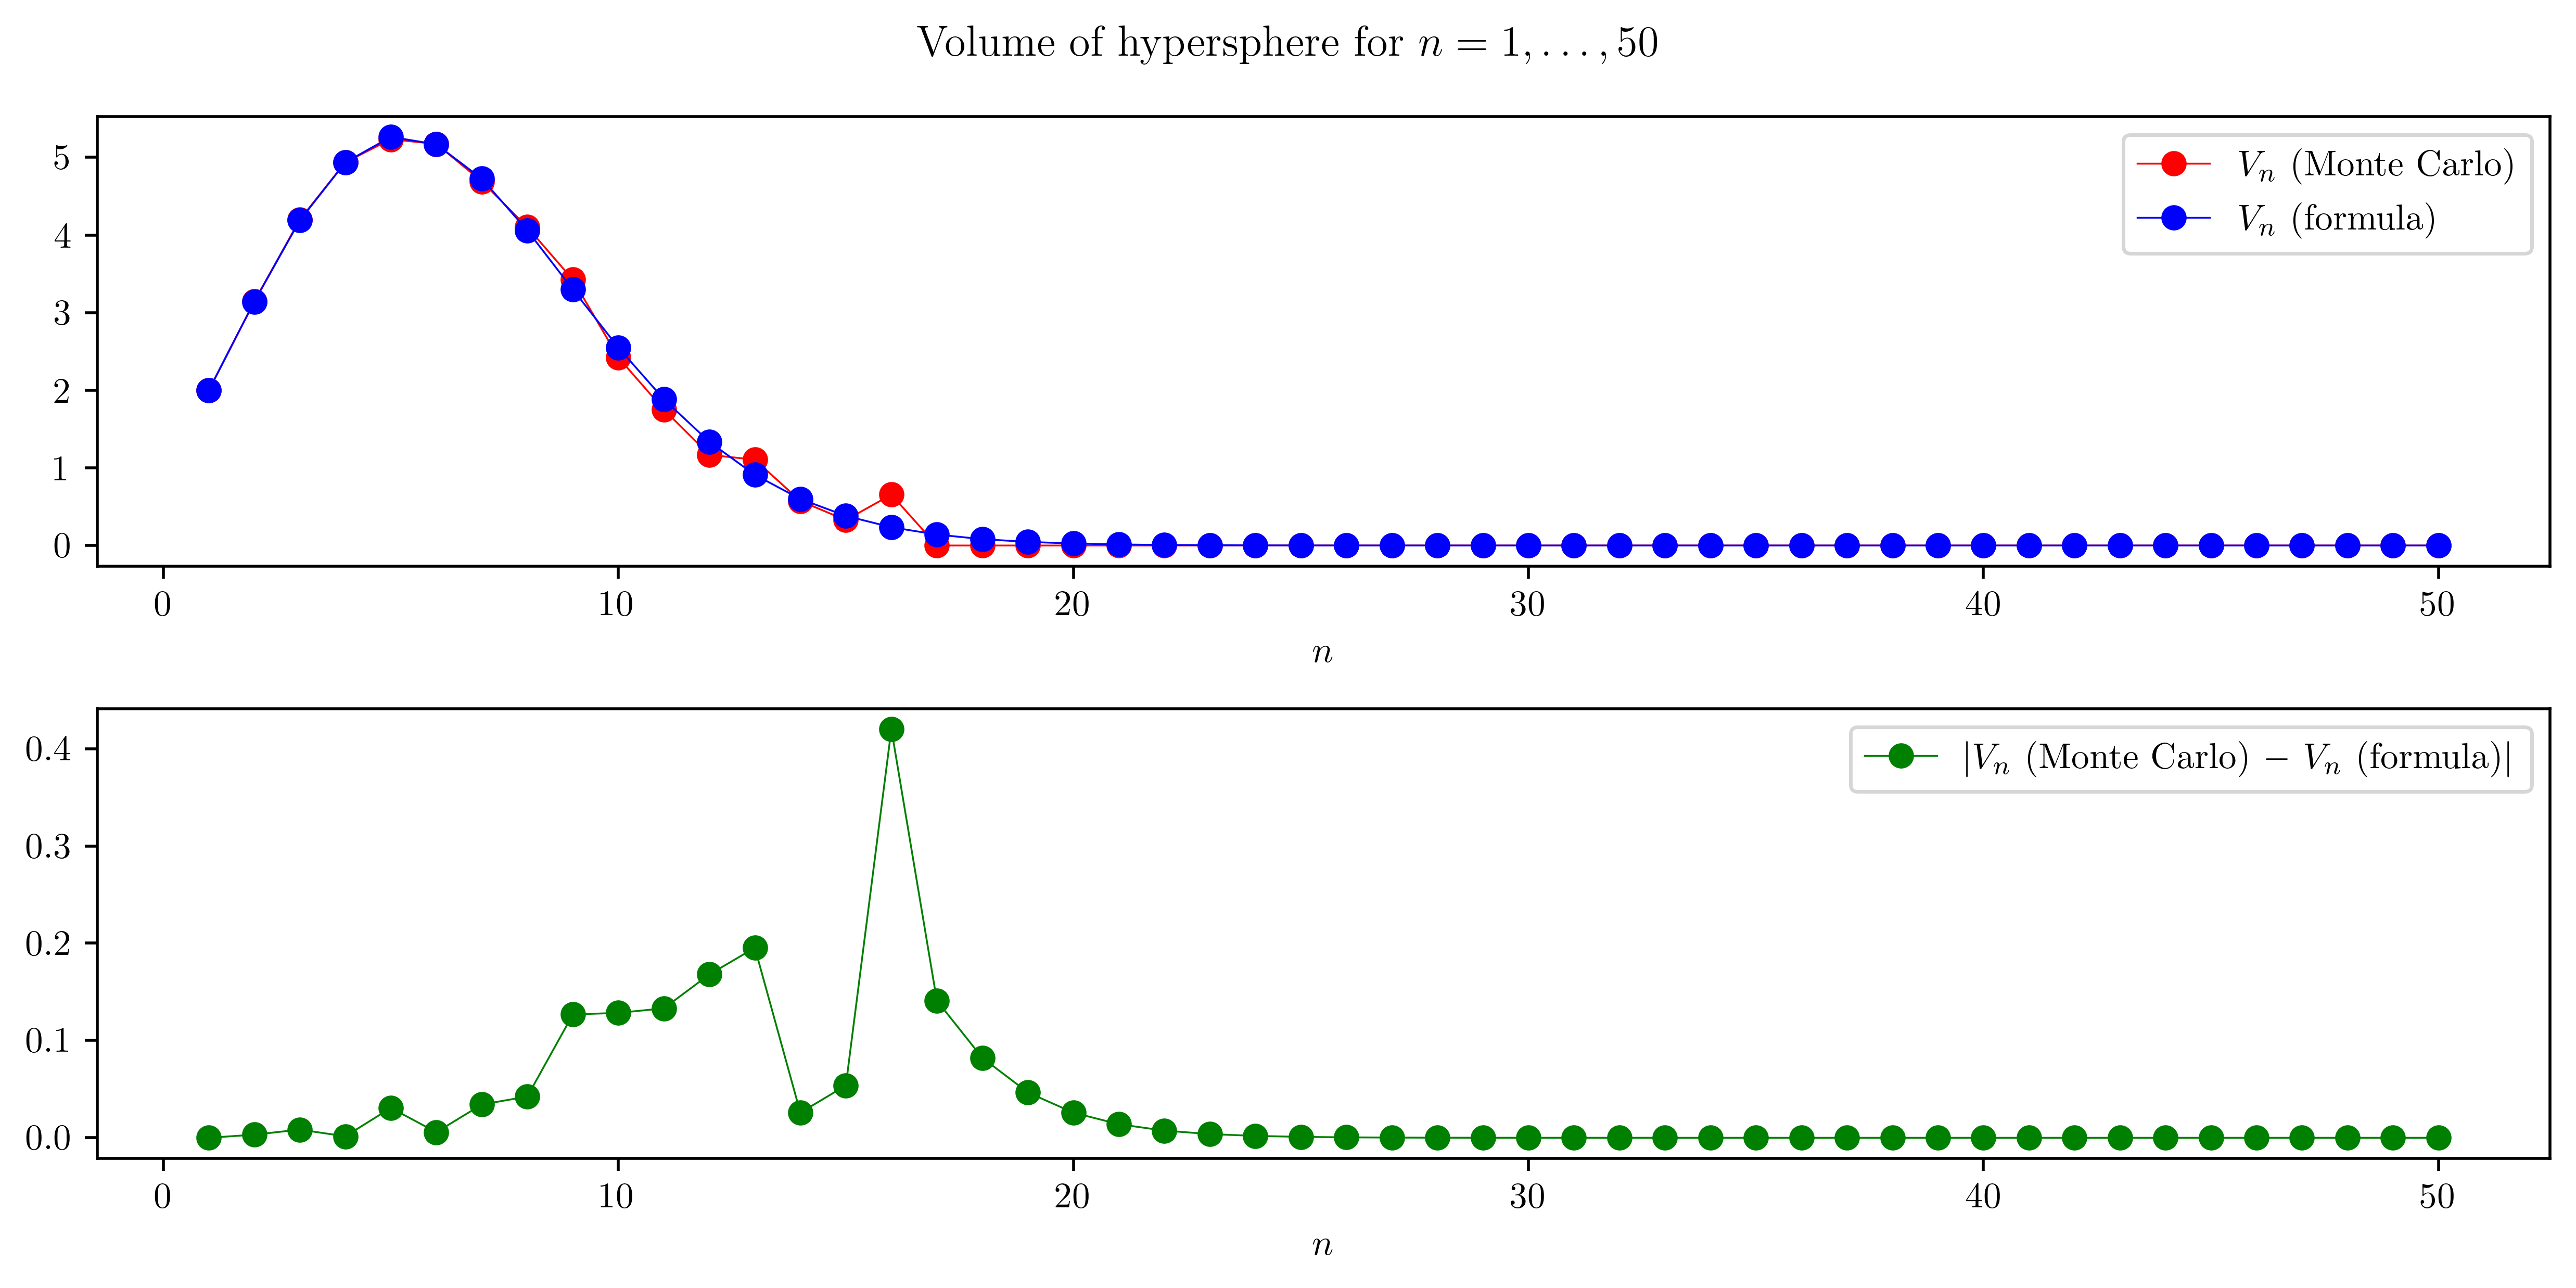

In [5]:
# Write your code here
def V_hypersphere(n):
    return pi**(n/2)/gamma(n/2+1)

for n_end in [10,50]:
    ns = range(1,n_end+1)
    Vn_MC = np.zeros(len(ns))
    Vn_FM = np.zeros(len(ns))

    print("Calculating Volumn of Hypersphere...\nn = [",end="")
    for i in range(len(ns)):
        Vn_MC[i] = V_hypersphere_MC(ns[i])
        Vn_FM[i] = V_hypersphere(ns[i])
        print(f"{ns[i]}, ",end="")
    print("]\nCalculateing done !")

    fig = plt.figure(figsize=(10,5),dpi=500)
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.plot(ns,Vn_MC,'-o',color='red',linewidth=0.5,label="$V_n$ (Monte Carlo)")
    ax1.plot(ns,Vn_FM,'-o',color='blue',linewidth=0.5,label="$V_n$ (formula)")
    ax2.plot(ns, np.abs(Vn_MC-Vn_FM),'-o',color='green',linewidth=0.5,label="$|$$V_n$ (Monte Carlo) $-$ $V_n$ (formula)$|$")
    ax2.set_xlabel("$n$")
    ax1.set_xlabel("$n$")
    ax1.legend()
    ax2.legend()
    fig.suptitle(f"Volume of hypersphere for $n = {ns[0]},\ldots, {ns[-1]}$")
    plt.tight_layout()
    plt.show()

## Problem 3

An important usage of Markov chain Monte Carlo simulation is in statistical inference. In particular it can be used to trace out probability landscapes, thereby enabling us to determine optimal values of model parameters and their uncertainties, for instance. 

To get a taste of how this is done, consider the following probability distribution:

In [6]:
from scipy.stats import norm

def dist(x):
    return norm.pdf(x, loc=-5, scale=1) + norm.pdf(x, loc=3, scale=2)

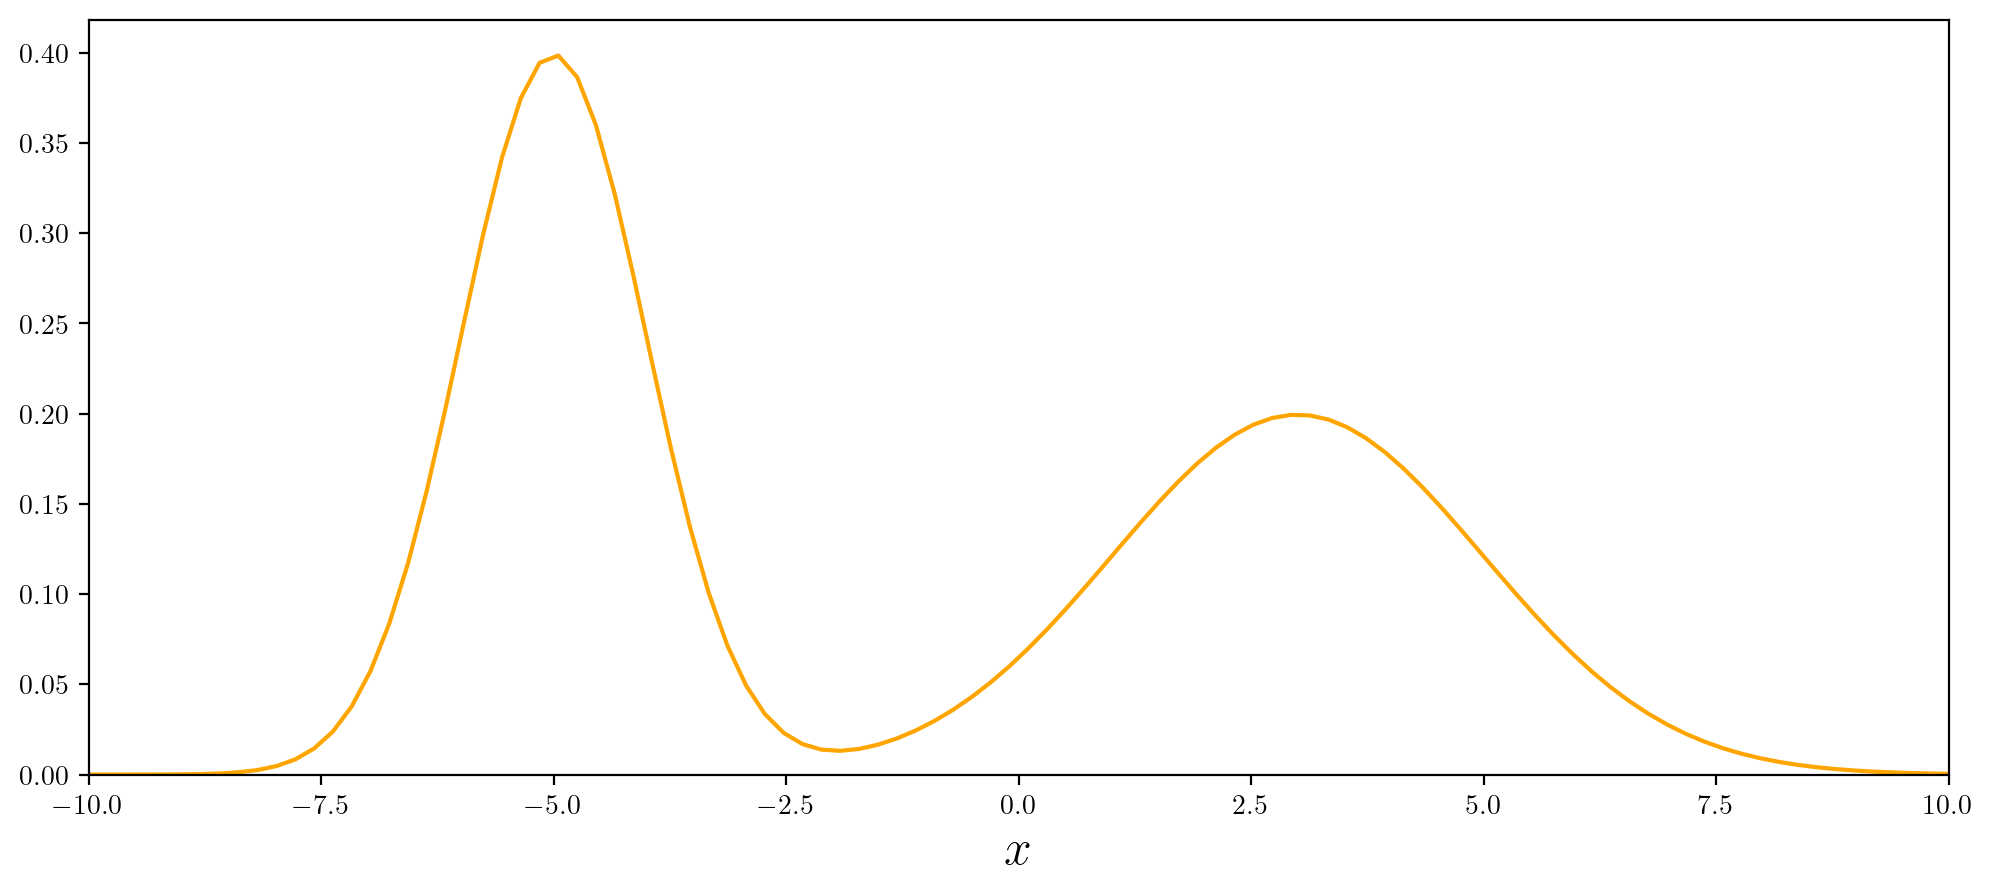

In [7]:
xs = np.linspace(-10, 10, 100)

plt.figure(figsize=(12,5),dpi=200)
plt.plot(xs, dist(xs), color='orange')
plt.xlabel(r'$x$', fontsize=18)
plt.xlim(-10, 10)
plt.ylim(0,)
plt.show()

Let us pretend that we do not know the shape of this distribution for a moment, and our goal is to trace it out using MCMC simulation.

### Problem 3.1 (3 points)

Write a program to perform MCMC simulation, in each iteration do the following:

1. Move $x$ by an amount $dx$, where $-\delta \le dx \le \delta$. The parameter $\delta$ is called the stepsize and is specified by you in advance.
2. Compute the probability $p'$ at the proposed point $x' = x + dx$. 
3. If $p' \ge p$, where $p$ is the probability at the original point $x$, then accept $x'$. If $p' \lt p$, then accept $x'$ with a probability $P_a = p'/p$.
4. Record current value of $x$, which might be the proposed point $x'$ (if accepetd in step 3) or the original point $x$ (if rejected in step 3).
5. Repeat from step 1.

Let us start at $x = 1$. Do $N = 10000$ MCMC steps. Tune the stepsize $\delta$ so that the whole simulation has an acceptance rate of about $0.3$.

In [8]:
# Write your code here
N = 10000
x = 1
delta = 1.0
X = np.zeros(N)
for step in range(N):
    dx = delta*(2*random()-1)
    x_ = x + dx
    p  = dist(x)
    p_ = dist(x_)
    if(p_ >= p or random() < p_/p):
        x = x_
    X[step] = x

### Problem 3.2 (1 point)

Make a histogram of the $x$ samples. The histogram should look like the underlying probability distribution we assumed in the very beginning.

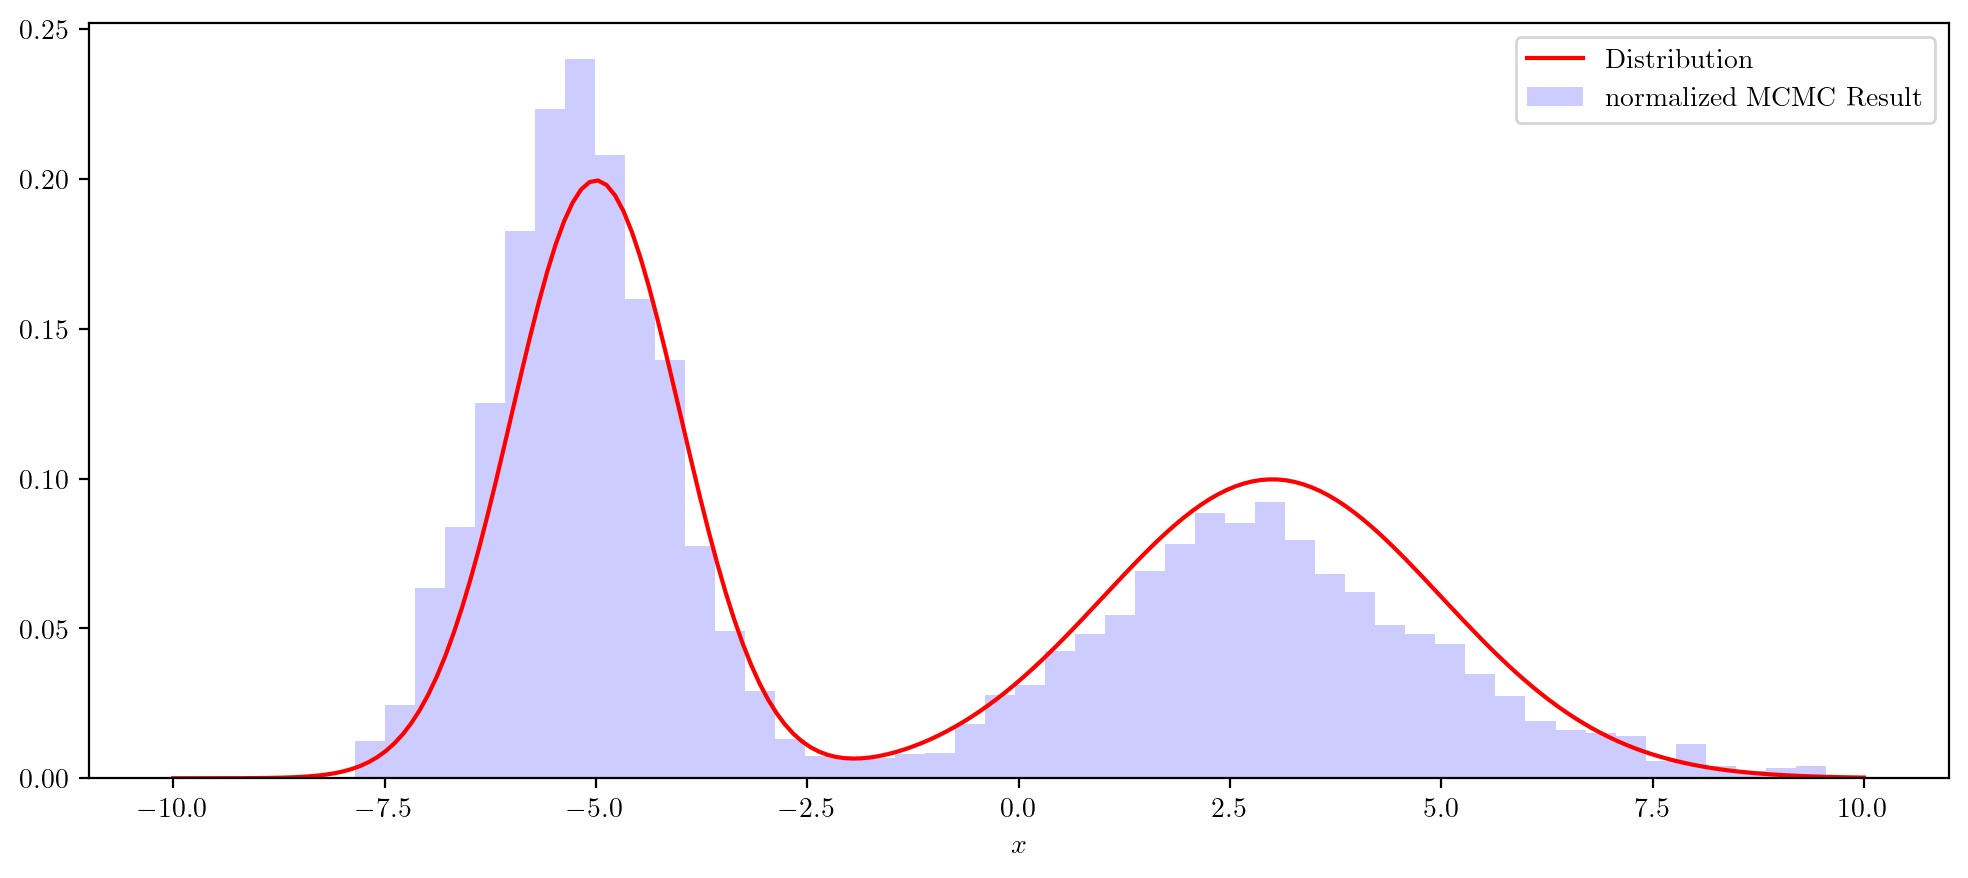

In [9]:
# Write your code here
xs = np.linspace(-10, 10, 200)
dist_sum,_ = quad(dist,-10,10)
dist_normalize = dist(xs)/dist_sum

plt.figure(figsize=(12,5), dpi=200)
plt.plot(xs,dist_normalize,color='red',label="Distribution")
hist, bins = np.histogram(X, bins=50, density=True)
plt.bar(bins[:-1], hist, width=np.diff(bins), alpha=0.2, color='blue',
        label="normalized MCMC Result")

plt.legend()
plt.xlabel(r'$x$')
plt.show()